In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
df.shape

(178, 14)

there are 13 features and 178 records.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [19]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

No null/ missing values present in the dataset.

In [20]:
#Checkimg for duplicate values:
df[df.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


No duplicate records found in the dataset.

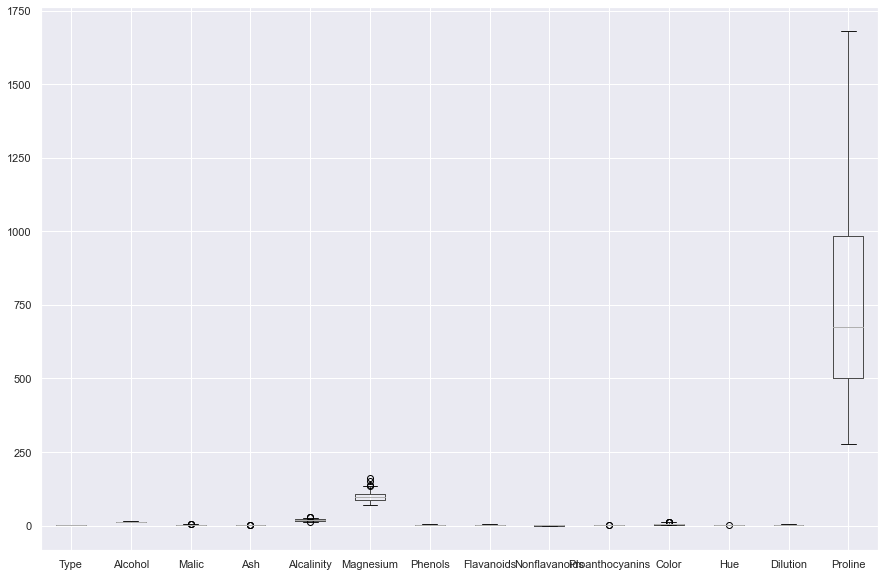

In [21]:
#Checking for any outliers in the dataset.
plt.rcParams["figure.figsize"] = [15, 10]
df.boxplot()

There are a few outliers present in the Magnesium variable.

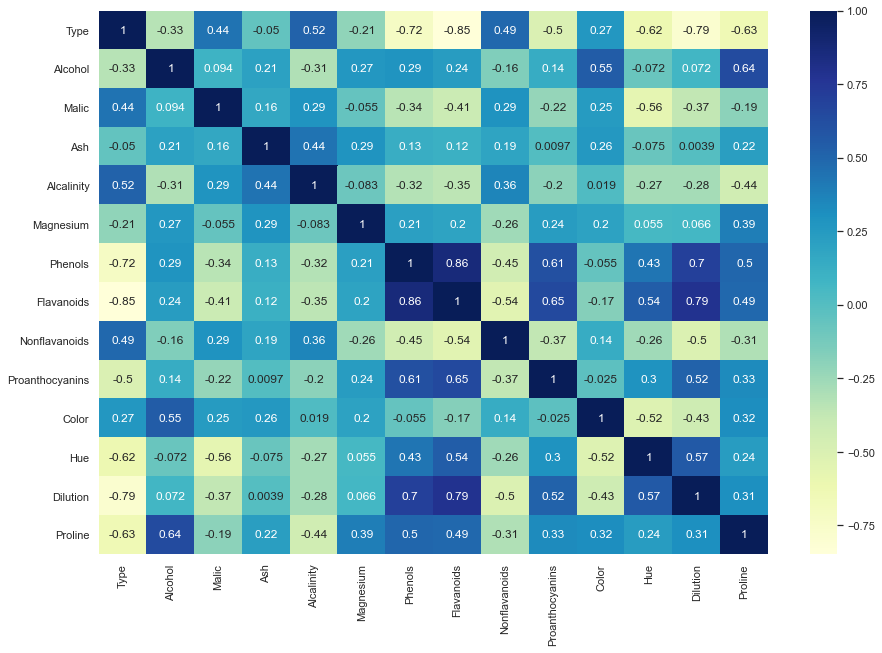

In [22]:
#Checking the correlation between the features:
import seaborn as sns
corr_plot = sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)

We could see that few of the variables are postively correlated while few are negatively correlated

Text(0, 0.5, 'Alcalinity')

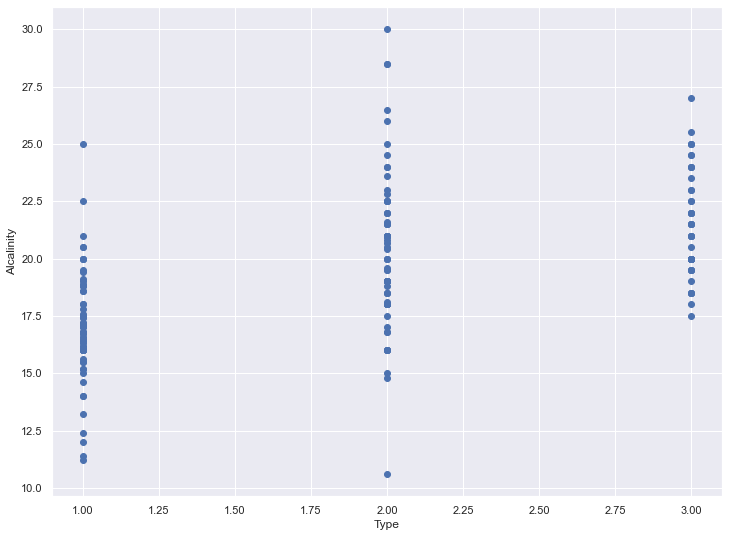

In [24]:
#Visulalize the raw data:
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,0],df.iloc[:,4])
plt.xlabel("Type")
plt.ylabel("Alcalinity")

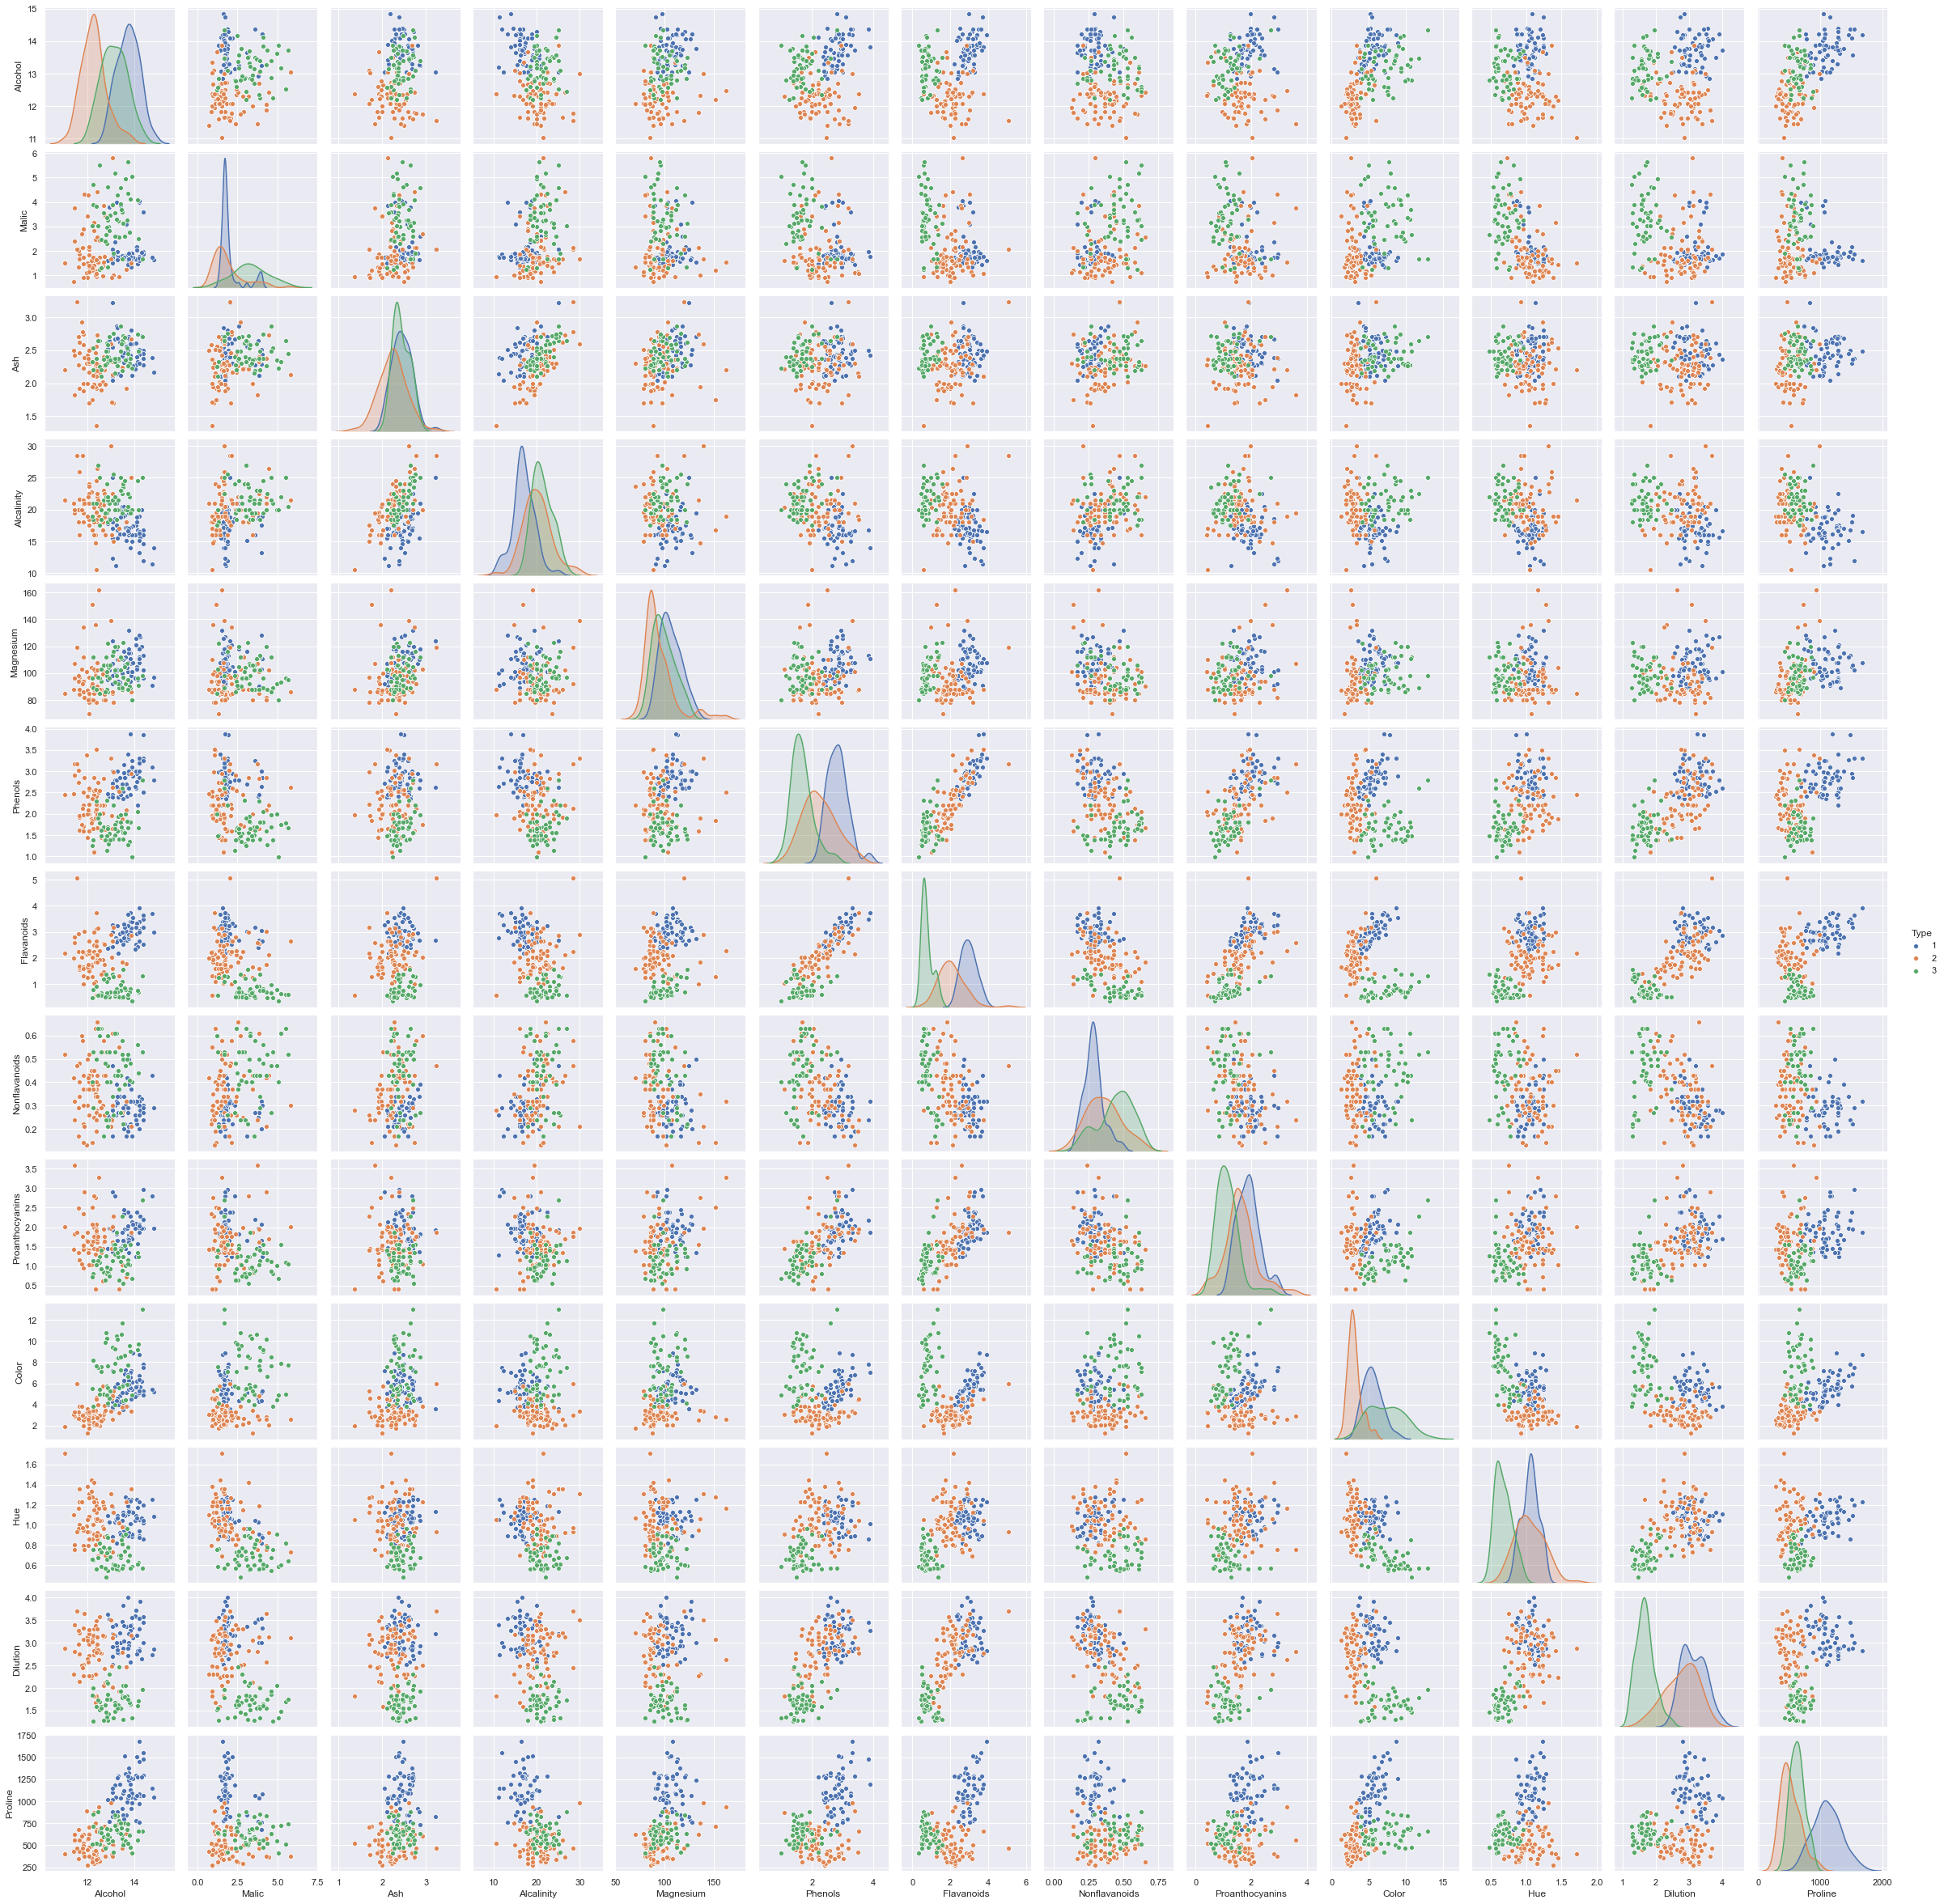

In [27]:
sns.pairplot(df, hue="Type")

In [29]:
#Standardizing the data:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [32]:
df_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [36]:
#Performing dimentionality reduction with PCA:
from sklearn.decomposition import PCA

In [37]:
pca = PCA()
pca.fit(df_norm)

PCA()

In [38]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

Text(0, 0.5, 'Cumulative Explained variance')

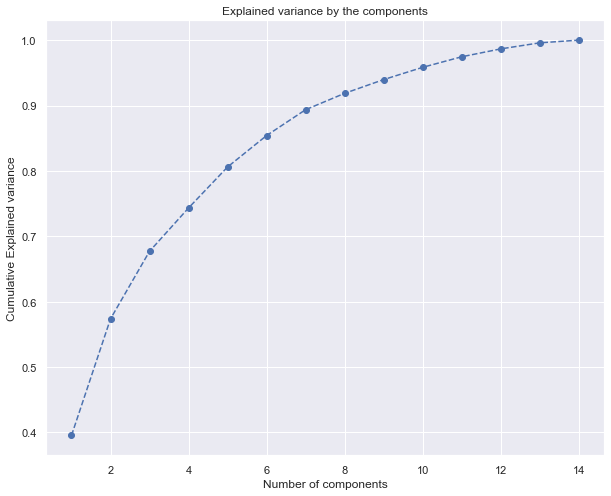

In [41]:
#WE can plot to determine on the pcs:
plt.figure(figsize=(10,8))
plt.plot(range(1,15),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained variance by the components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained variance")

It is necessary to preserve 80% of the variance. so, 5 components are selected here.

In [42]:
#PCA is performed with the selected 5 components:
pca = PCA(n_components=5)

In [43]:
#Fitting the model with our selected components:
pca.fit(df_norm)

PCA(n_components=5)

In [45]:
scores_pca = pca.transform(df_norm)

In [46]:
scores_pca

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01,
        -1.32728225e-02,  7.37345361e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00,
        -4.17144363e-01, -2.83213734e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01,
         6.64232412e-01, -3.87564967e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01,
         5.65087823e-01, -3.24359712e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00,
        -4.40905804e-01,  2.27949246e-01],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01,
        -6.05371900e-01, -4.09626431e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01,
        -3.53588487e-01, -1.02427680e+00],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01,
        -1.24560173e+00,  2.07437858e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00,
        -1.56826533e-01, -8.58464843e-01],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01,
         2.70293146e-01

The above PCA scores can be incorporated to our k-means and hierarchical clustering.

In [47]:
#KMEANS clustering with PCA:
from sklearn.cluster import KMeans

In [48]:
#fitting the kmeans:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\GOWRI DHANASEKARAN\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

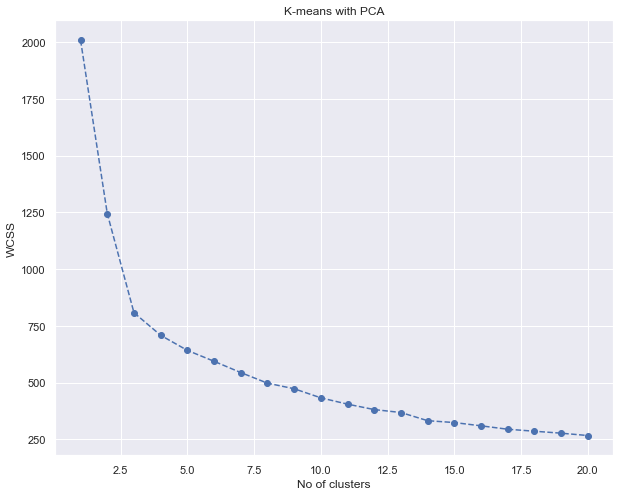

In [49]:
#plotting the wcss:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.title("K-means with PCA")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")

3 is the cluster mark with reference to the plot

In [50]:
#Kmeans implementation with 3 clusters:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [53]:
#Obtaining the results:
df_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)
df_kmeans.columns.values[-5:] = ['component_1','component_2','component_3','component_4','component_5']
df_kmeans['segement_kmeans_pca']=kmeans_pca.labels_

In [54]:
df_kmeans.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,component_1,component_2,component_3,component_4,component_5,segement_kmeans_pca
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-2.785029,-1.036936,0.983238,0.664232,-0.387565,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1.407511,-0.867773,2.025829,-0.440906,0.227949,1


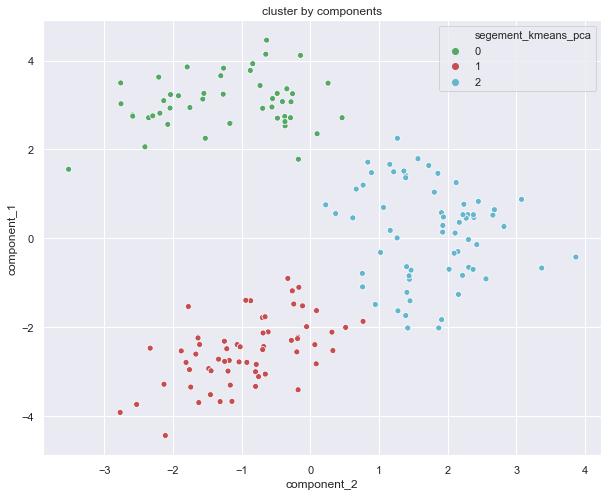

In [57]:
#visualize the components:
x_axis = df_kmeans['component_2']
y_axis = df_kmeans['component_1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_kmeans['segement_kmeans_pca'], palette=['g','r','c'])
plt.title("cluster by components")
plt.show()

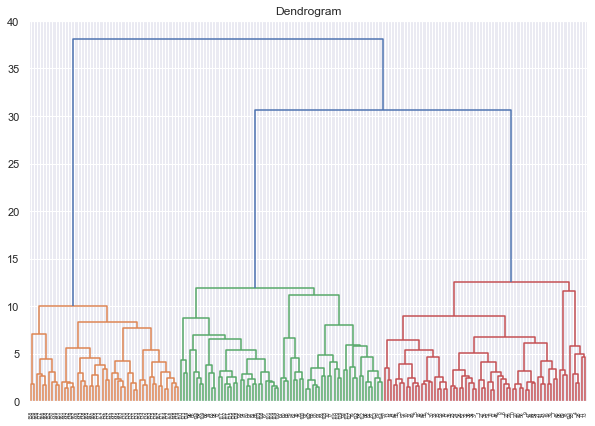

In [58]:
#Hirarchical clustering with PCA:
#First to plot dendrogram:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))

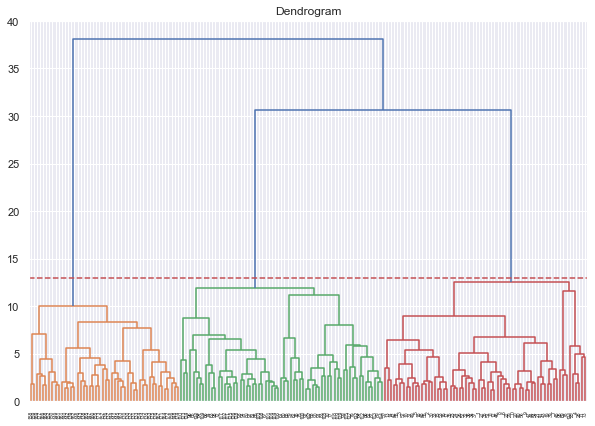

In [61]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.axhline(y=13, color='r',linestyle='--')

In [62]:
#Hierarchical clustering to be applied for the above 2 clusters:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')


In [63]:
#Fitting the data with pca:
cluster.fit(scores_pca)

AgglomerativeClustering(n_clusters=3)

In [64]:
#Obtaining the results:
cluster_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)
cluster_df.columns.values[-5:] = ['component_1','component_2','component_3','component_4','component_5']
cluster_df['segement_cluster_pca']=cluster.labels_

In [65]:
cluster_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,component_1,component_2,component_3,component_4,component_5,segement_cluster_pca
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-2.785029,-1.036936,0.983238,0.664232,-0.387565,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1.407511,-0.867773,2.025829,-0.440906,0.227949,2


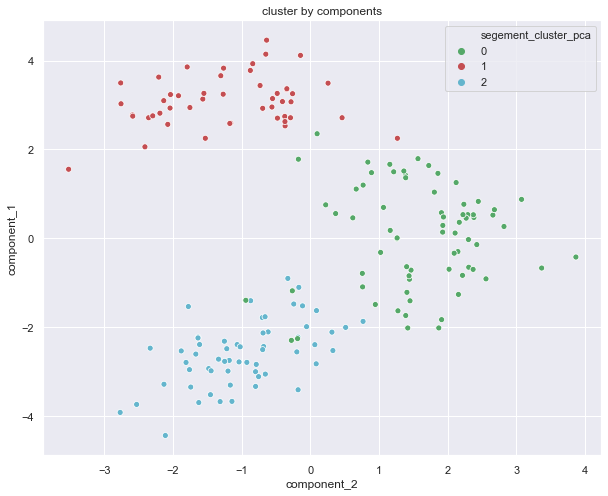

In [66]:
#visualize the components:
x_axis = cluster_df['component_2']
y_axis = cluster_df['component_1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = cluster_df['segement_cluster_pca'], palette=['g','r','c'])
plt.title("cluster by components")
plt.show()

By doing PCA with kmeans and Hierarchical clustering, we could see that both models better clustered the group.
While, Kmeans with PCA performed better than the hirarchical clustering